In [15]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pydataset as data

from env import host, username, password
import prepare
import acquire


In [16]:
telco_df = acquire.get_telco_data()


In [17]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [18]:
telco_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [19]:
telco_df[telco_df['total_charges'] == ' ']

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
85,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
156,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
236,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
255,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
339,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5681,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
5717,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
5727,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
5798,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
6007,2,3,3,7644-OMVMY,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,19.85,,No,Two year,None,Mailed check


In [20]:
telco_df.isnull().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [21]:
telco_df['total_charges'] = telco_df['total_charges'] + '0'

In [22]:
telco_df['total_charges'] = telco_df['total_charges'].astype('float')
telco_df['total_charges'].dtype

dtype('float64')

In [23]:
telco_df[telco_df['total_charges'] == ' ']

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [24]:
telco_df.duplicated().sum()

0

In [25]:
# list the current columns
telco_df.columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [26]:
#use nunique to look at the obj data types
telco_df.nunique()

payment_type_id                4
internet_service_type_id       3
contract_type_id               3
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
contract_type                  3
internet_service_type          3
payment_type                   4
dtype: int64

In [27]:
telco_df.head().T


,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes


In [28]:
telco_df.partner = telco_df.partner.replace({'Yes': 1, 'No': 0})

In [29]:
telco_df.dependents = telco_df.dependents.replace({'Yes': 1, 'No': 0})
telco_df.online_security = telco_df.online_security.replace({'No internet service': 0, 'Yes': 1, 'No': 0})
telco_df.online_backup = telco_df.online_backup.replace({'No internet service': 0, 'Yes': 1, 'No': 0})
telco_df.device_protection = telco_df.device_protection({'Yes': 1, 'No': 0})
telco_df.tech_support = telco_df.tech_support({'Yes': 1, 'No': 0})
telco_df.streaming_tv = telco_df.streaming_tv({'Yes': 1, 'No': 0})
telco_df.streaming_movies = telco_df.streaming_movies({'Yes': 1, 'No': 0})
telco_df.paperless_billing = telco_df.paperless_billing({'Yes': 1, 'No': 0})
telco_df['online services'] = telco_df.online_security + telco_df.online_backup
telco_df = telco_df.drop(columns = ['online security', 'online_backup'])
telco_df.streaming_tv = telco_df.streaming_tv.replace({'No internet service': 0, 'Yes': 1, 'No': 0})
telco_df.streaming_movies = telco_df.streaming_movies.replace({'No internet service': 0, 'Yes': 1, 'No': 0})
telco_df['streaming_services'] = telco_df.streaming_tv + telco_df.streaming_movies
telco_df = telco_df.drop(columns=['streaming_tv', 'streaming_movies'])

TypeError: 'Series' object is not callable

In [89]:
# Iterate over the list to see the unique values in these columns
for column in obj_columns:
    print(telco_df[column].value_counts().sort_index())
    print('---------------------------')

1    2365
2    1612
3    1544
4    1522
Name: payment_type_id, dtype: int64
---------------------------
1    2421
2    3096
3    1526
Name: internet_service_type_id, dtype: int64
---------------------------
1    3875
2    1473
3    1695
Name: contract_type_id, dtype: int64
---------------------------
No                  3390
No phone service     682
Yes                 2971
Name: multiple_lines, dtype: int64
---------------------------
No                     3498
No internet service    1526
Yes                    2019
Name: online_security, dtype: int64
---------------------------
No                     3088
No internet service    1526
Yes                    2429
Name: online_backup, dtype: int64
---------------------------
No                     3095
No internet service    1526
Yes                    2422
Name: device_protection, dtype: int64
---------------------------
No                     3473
No internet service    1526
Yes                    2044
Name: tech_support, dtype: int64

In [90]:
telco_df.senior_citizen

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: senior_citizen, Length: 7043, dtype: int64

Text(0.5, 0, 'Tenure (in months)')

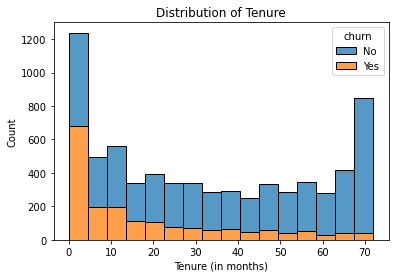

In [91]:
sns.histplot(telco_df,
             x=telco_df.tenure,
             hue='churn',
             multiple='stack')

plt.title("Distribution of Tenure")
plt.xlabel('Tenure (in months)')

# plt.xlim(0, telco_df.tenure.max());

(18.25, 118.75)

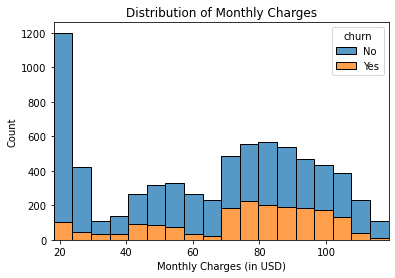

In [92]:
sns.histplot(data=telco_df,
            x=telco_df.monthly_charges,
            hue=telco_df.churn,
            multiple='stack')

plt.title("Distribution of Monthly Charges")
plt.xlabel('Monthly Charges (in USD)')

plt.xlim(telco_df.monthly_charges.min(),
         telco_df.monthly_charges.max())

# plt.xticks(np.linspace(18, 120, 24));

In [93]:
telco_df.churn

0        No
1        No
2        No
3        No
4        No
       ... 
7038     No
7039     No
7040     No
7041     No
7042    Yes
Name: churn, Length: 7043, dtype: object

In [94]:
telco_df['churn'] = (telco_df['churn'] == 'Yes').astype(int)

In [95]:
df_dummies = pd.get_dummies(telco_df.gender, drop_first=True)

In [97]:
telco_df = pd.concat([telco_df, df_dummies],axis=1)

    # Drop the column, we do not need the string version of gender
telco_df = telco_df.drop('gender', axis=1)
print('Dummy variables for gender created as "male".')

Dummy variables for gender created as "male".


In [108]:
telco_df.head()


,payment_type_id,internet_service_type_id,contract_type_id,customer_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,...,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,Male,Male
0,2,1,3,0016-QLJIS,0,1,1,65,1,Yes,...,Yes,1,90.45,5957.90,0,Two year,DSL,Mailed check,0,0
1,4,1,3,0017-DINOC,0,0,0,54,0,No phone service,...,No,0,45.20,2460.55,0,Two year,DSL,Credit card (automatic),1,1
2,3,1,3,0019-GFNTW,0,0,0,56,0,No phone service,...,No,0,45.05,2560.10,0,Two year,DSL,Bank transfer (automatic),0,0
3,4,1,3,0056-EPFBG,0,1,1,20,0,No phone service,...,No,1,39.40,825.40,0,Two year,DSL,Credit card (automatic),1,1
4,3,1,3,0078-XZMHT,0,1,0,72,1,Yes,...,Yes,1,85.15,6316.20,0,Two year,DSL,Bank transfer (automatic),1,1


In [48]:
telco_df.columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [100]:
telco_df2 = telco_df.drop(columns=['payment_type_id', 'internet_service_type', 'contract_type_id', 'customer_id'])

In [101]:
# prepare the data
train_validate, test = train_test_split(telco_df2,
                                            test_size=.2,
                                            random_state=123,
                                            stratify=telco_df.churn
                                            )
    
train, validate = train_test_split(train_validate,
                                       test_size=.3,
                                       random_state=123,
                                       stratify=train_validate.churn)


In [102]:
train.shape

(3943, 21)

In [103]:
X_train, y_train = train.drop(columns='churn'), train['churn']
X_validate, y_validate = validate.drop(columns='churn'), validate['churn']
X_test, y_test = test.drop(columns='churn'), test['churn']

In [104]:
baseline = DummyClassifier(strategy='constant', constant=0)
# 2. Fit the object
baseline.fit(X_train, y_train)
# how does it do on training data set?
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy: 0.7347


In [105]:
dt1 = DecisionTreeClassifier(max_depth=4)
dt1.fit(X_train, y_train)
dt1.score(X_train,y_train)

ValueError: could not convert string to float: 'Yes'

In [113]:
telco_df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   internet_service_type_id  7043 non-null   int64  
 1   senior_citizen            7043 non-null   int64  
 2   partner                   7043 non-null   object 
 3   dependents                7043 non-null   object 
 4   tenure                    7043 non-null   int64  
 5   phone_service             7043 non-null   object 
 6   multiple_lines            7043 non-null   object 
 7   online_security           7043 non-null   object 
 8   online_backup             7043 non-null   object 
 9   device_protection         7043 non-null   object 
 10  tech_support              7043 non-null   object 
 11  streaming_tv              7043 non-null   object 
 12  streaming_movies          7043 non-null   object 
 13  paperless_billing         7043 non-null   object 
 14  monthly_